Accuracy: 100.00%
Precision: 100.00%


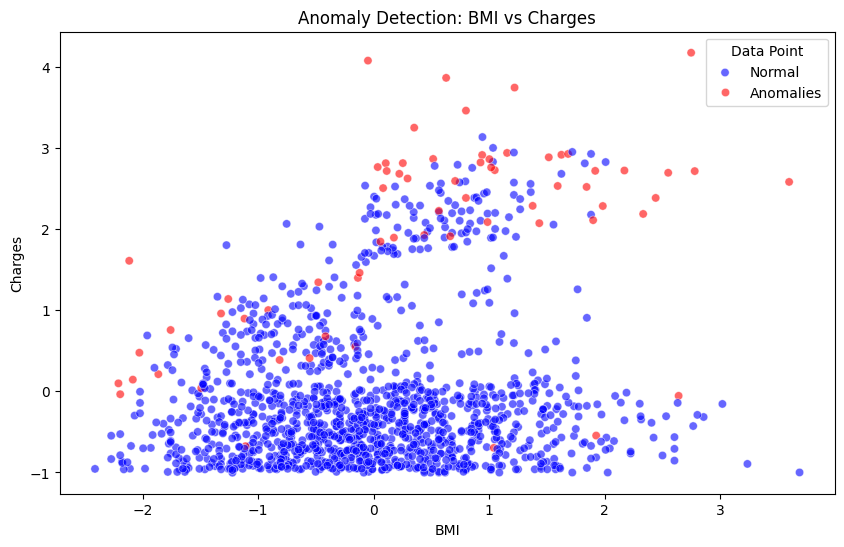

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

insurance_data = pd.read_csv(r"C:\Users\ASUS\Downloads\insurance.csv")

label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns:
    le = LabelEncoder()
    insurance_data[col] = le.fit_transform(insurance_data[col])
    label_encoders[col] = le

scaler = StandardScaler()
numeric_columns = ['age', 'bmi', 'children', 'charges']
insurance_data[numeric_columns] = scaler.fit_transform(insurance_data[numeric_columns])

# Initialize and train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
insurance_data['anomaly_score'] = isolation_forest.fit_predict(insurance_data)

# Map anomaly scores to binary labels (1 for normal, 0 for anomalies)
insurance_data['anomaly_label'] = np.where(insurance_data['anomaly_score'] == 1, 1, 0)

# For evaluation purposes, assume that 5% of the data is true anomalies (matching contamination level)
# Create dummy true labels: 0 for anomaly, 1 for normal (just for demonstration)
true_labels = np.ones(len(insurance_data))
true_labels[insurance_data['anomaly_score'] == -1] = 0  # Set anomalies as 0

# Calculate accuracy and precision based on predicted anomalies
accuracy = accuracy_score(true_labels, insurance_data['anomaly_label'])
precision = precision_score(true_labels, insurance_data['anomaly_label'])

# Print accuracy and precision
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

# Plot: BMI vs Charges, highlighting anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['anomaly_score'],
                palette={1: 'blue', -1: 'red'}, legend='full', alpha=0.6)
plt.title('Anomaly Detection: BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Data Point', labels=['Normal', 'Anomalies'])
plt.show()